#### MÓDULO 3 - TRANSFORMANDO LOS DATOS
## EVALUACIÓN FINAL - SOFIA GIMENEZ

FASE 1 - EXPLORACIÓN Y LIMPIEZA

1. EXPLORACIÓN INICIAL:

    - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
    - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
    - Une los dos conjuntos de datos de la forma más eficiente.

2. LIMPIEZA DE DATOS:

    - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
    - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
    - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

FASE 2 - VISUALIZACIÓN

- Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

BONUS - FASE 3 - EVALUACIÓN DE DIFERENCIAS EN RESERVAS DE VUELOS POR NIVEL EDUCATIVO

- Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.
3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.
----------------------------------------------


1. EXPLORACIÓN INICIAL:

    - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
    - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
    - Une los dos conjuntos de datos de la forma más eficiente.

In [1]:
# ========================
# IMPORTACIÓN DE LIBRERÍAS
# ========================

# Importamos las librerías para el tratamiento de datos:
import pandas as pd
import numpy as np

# Importamos las librerías para la visualización:
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos las librerías para evaluar la linealidad de las relaciones entre las variables y la distribución de las variables:
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

# Importamos las librerías para la imputación de nulos usando métodos avanzados estadísticos:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Importamos las librerías para la gestión de los warnings:
import warnings
warnings.filterwarnings("ignore")

# Importamos librerías que permiten conectarse y trabajar con bases de datos de manera más abstracta y flexible.
# 'create_engine' permite crear una conexión a bases de datos SQL de diferentes tipos, como MySQL, PostgreSQL, SQLite, etc.
import pymysql
from sqlalchemy import create_engine

# Configuramos para poder visualizar todas las columnas de los DataFrames:
pd.set_option('display.max_columns', None)

In [2]:
# ====================================================
# EXTRACCIÓN: Obtener los datos desde los archivos CSV
# ====================================================

# Extraemos (o realizamos la lectura) de los datos a través de la función "extract_data":
def extract_data(file_path):
    print(f"Extrayendo datos desde {file_path}...")
    data = pd.read_csv(file_path, index_col=0)
    print(data.head())
    return data


In [3]:
# Llamamos a la función "extract_data" para que lea los dos archivos que vamos a analizar.
# Nombramos cada base de datos para poder trabajar sus Data Frame por separado.
flights = extract_data('Customer_Flight_Activity.csv')
loyalties = extract_data('Customer_Loyalty_History.csv')

Extrayendo datos desde Customer_Flight_Activity.csv...
                Year  Month  Flights Booked  Flights with Companions  \
Loyalty Number                                                         
100018          2017      1               3                        0   
100102          2017      1              10                        4   
100140          2017      1               6                        0   
100214          2017      1               0                        0   
100272          2017      1               0                        0   

                Total Flights  Distance  Points Accumulated  Points Redeemed  \
Loyalty Number                                                                 
100018                      3      1521               152.0                0   
100102                     14      2030               203.0                0   
100140                      6      1200               120.0                0   
100214                      0         0 

In [4]:
# =========================================================================
# EXPLORACIÓN INICIAL: Identificación de posibles problemas en los datasets
# =========================================================================

In [5]:

# Primero vamos a explorar el DataFrame nombrado 'flights' sobre el archivo "Customer_Flight_Activity.csv":

print(f"INFORMACIÓN 'flights' de número filas, columnas, tipos de datos, etc. \n{flights.info()}")
print("-----------------------------------------------------")
print(f"Muestra de 'flights' el TIPO DE DATO de cada columna \n{flights.dtypes}")
print("-----------------------------------------------------")
print(f"Muestra de 'flights' el número de FILAS y de COLUMNAS \n{flights.shape}")
print("-----------------------------------------------------")
print(f"Muestra de 'flights' los nombres de las COLUMNAS \n{flights.columns}")
print("-----------------------------------------------------")
print(f"Muestra de 'flights' las ESTADÍSTICAS BÁSICAS \n{flights.describe().T}")
print("-----------------------------------------------------")
print(f"Muestra de 'flights' los DUPLICADOS \n{flights.duplicated()}")
print("-----------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB
INFORMACIÓN 'flights' de número filas, columnas, tipos de datos, etc. 
None
-----------------------------------------------------
Muestra de 'flights' el TIPO DE DATO de cada columna 
Year  

CONCLUSIONES DE LA EXPLORACIÓN INICIAL EN DATAFRAME 'flights' de "Customer_Flight_Activity.csv":

- Todos los valores son numéricos.
- Todas las columnas son 'integer', menos 'Points Accumulated' que lleva decimales y por lo tanto es 'float'.
- Existen 405624 filas y 9 columnas.
- Ninguna columna tiene valores nulos.
- Deducimos que prácticamente se registraron todos los vuelos en el año 2017. Lo que significa que tiene una desviación muy pequeña del 0.5 hacia el año 2018.
- La distribución de los meses de los vuelos es muy similar a lo largo del año. Ya que la media es de 6.5, la mitad del año, prácticamente.
- Sin embargo, en el número de vuelos reservado, la media no es tan fiable, ya que su desviación estándar es superior que el dato de la media.
- Siendo similar lo que sucede con el número de vuelos reservados con acompañante.
- Existen varias filas con ceros en las columnas de 'Flights Booked' y de 'Total Flights'. No aportan información, ya que no han realizado reservas de vuelos.

In [6]:
# Segundo vamos a explorar el DataFrame nombrado 'loyalties' sobre el archivo "Customer_Loyalty_History.csv":

print(f"INFORMACIÓN 'loyalties' de número filas, columnas, tipos de datos, etc. \n{loyalties.info()}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' el TIPO DE DATO de cada columna \n{loyalties.dtypes}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' el número de FILAS y de COLUMNAS \n{loyalties.shape}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' los nombres de las COLUMNAS \n{loyalties.columns}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' las ESTADÍSTICAS BÁSICAS para valores NUMÉRICOS \n{loyalties.describe().T}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' las ESTADÍSTICAS BÁSICAS para valores CATEGÓRICOS \n{loyalties.describe(include='object').T}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' los DUPLICADOS \n{loyalties.duplicated()}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' los VALORES ÚNICOS en la columna 'Enrollment Type'\n{loyalties['Enrollment Type'].unique()}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' los VALORES ÚNICOS en la columna 'Loyalty Card'\n{loyalties['Loyalty Card'].unique()}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' los VALORES ÚNICOS en la columna 'Marital Status'\n{loyalties['Marital Status'].unique()}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'loyalties' los VALORES ÚNICOS en la columna 'Education'\n{loyalties['Education'].unique()}")
print("-------------------------------------------------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0

INFORMACIÓN 'loyalties' de número filas, columnas, tipos de datos, etc. 
None
-------------------------------------------------------------------------------------------------
Muestra de 'loyalties' el TIPO DE DATO de cada columna 
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object
-------------------------------------------------------------------------------------------------
Muestra de 'loyalties' el número de FILAS y de COLUMNAS 
(16737, 15)
-------------------------------------------------------------------------------------------------
Muestra de 'loyalties' los nombres de l

CONCLUSIONES DE LA EXPLORACIÓN INICIAL EN DATAFRAME 'loyalties' de "Customer_Loyalty_History.csv":

- En este Dataset tenemos tanto variables numéricas como categóricas. Por esto la exploración ha requerido de nuesvas funciones de Pandas para poder sacar conclusiones.
- Respecto a los TIPOS DE DATOS: Las columnas 'Cancellation Year' y 'Cancellation Month' debería ser un 'int', en lugar de un 'float', ya que son años y meses y por lo tanto no tienen decimales.
- Respecto a los VALORES NULOS: Las columnas 'Cancellation Year' y 'Cancellation Month' tienen valores nulos, porque los clientes siguen siendo fieles al programa de lealtad.
- Siguiendo con los valores NULOS: destaca que 'Salary' tenga tantos nulos. Y sobre todo porque su valor mínimo es -58486.00. cuando un salario nunca puede ser negativo.

In [7]:
# ===============================
# UNIÓN: Unir los dos data frames 
# ===============================

# Unimos los DataFrames a través del método MERGE, porque une a través de columnas en común, en este caso 'Loyalty Number'
merge = pd.merge(flights, loyalties, on='Loyalty Number', how='left')
merge.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [8]:
# Tercero vamos a explorar el DataFrame creado de la unión 'merge':

print(f"INFORMACIÓN 'merge' de número filas, columnas, tipos de datos, etc. \n{merge.info()}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'merge' el TIPO DE DATO de cada columna \n{merge.dtypes}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'merge' el número de FILAS y de COLUMNAS \n{merge.shape}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'merge' los nombres de las COLUMNAS \n{merge.columns}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'merge' las ESTADÍSTICAS BÁSICAS \n{merge.describe().T}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'merge' los VALORES ÚNICOS en la columna 'Enrollment Type'\n{merge['Enrollment Type'].unique()}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'merge' los VALORES ÚNICOS en la columna 'Loyalty Card'\n{merge['Loyalty Card'].unique()}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'merge' los VALORES ÚNICOS en la columna 'Marital Status'\n{merge['Marital Status'].unique()}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'merge' los VALORES ÚNICOS en la columna 'Education'\n{merge['Education'].unique()}")

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
 9   Country                      405624 non-null  object 
 10  Province                     405624 non-null  object 
 11  City                         405624 non-null  object 
 12  Postal Code                  405624 non-null  object 
 13 

2. LIMPIEZA DE DATOS:

    - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
    - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
    - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [9]:
# ===============================================
# TRANSFORMACIÓN: Limpiar y transformar los datos
# ===============================================

In [10]:
# Primero creamos una copia del dataset para realizar las transformaciones, por seguridad:
merge_copy = merge.copy()
merge_copy

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN


In [11]:
# ===========================================================
# EXPLORACIÓN Y TRANSFORMACIÓN de la columna 'Total Flights'
# ===========================================================

# Eliminamos las filas con ceros en la columna'Total Flights' porque realmente no son clientes activos:
df_sin_ceros = merge_copy[merge_copy['Total Flights'] != 0]
print(df_sin_ceros)

                Year  Month  Flights Booked  Flights with Companions  \
Loyalty Number                                                         
100018          2017      1               3                        0   
100102          2017      1              10                        4   
100140          2017      1               6                        0   
100428          2017      1               6                        0   
100550          2017      1               3                        0   
...              ...    ...             ...                      ...   
999550          2018     12              15                        0   
999589          2018     12              14                        0   
999631          2018     12              11                        1   
999758          2018     12               1                        0   
999940          2018     12               3                        0   

                Total Flights  Distance  Points Accumulated  Po

In [12]:
df_sin_ceros.reset_index()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.0,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN
4,100550,2017,1,3,0,3,2037,203.0,0,0,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,54133.0,Married,Nova,7861.80,Standard,2013,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207627,999550,2018,12,15,0,15,2985,298.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Doctor,125167.0,Divorced,Star,13736.13,Standard,2014,8,NaN,NaN
207628,999589,2018,12,14,0,14,4690,469.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Male,College,NaN,Married,Nova,5003.34,Standard,2018,6,NaN,NaN
207629,999631,2018,12,11,1,12,2244,224.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,47349.0,Divorced,Star,2572.51,Standard,2014,1,NaN,NaN
207630,999758,2018,12,1,0,1,896,89.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Single,Star,18690.34,Standard,2018,8,NaN,NaN


In [13]:
# Creamos una copia del dataset para realizar las transformaciones, por seguridad:
df = df_sin_ceros.copy()

In [14]:
# ==============================================================
# EXPLORACIÓN Y TRANSFORMACIÓN de la columna 'Cancellation Year'
# ==============================================================

# Comprobamos los valores únicos de las columnas, por si tuviera algún valor atípico:
print(df['Cancellation Year'].unique())

[  nan 2018. 2017.]


In [15]:
# Vamos a explorar las columnas 'Cancellation Year':
print(f"Muestra de 'Cancellation Year' los VALORES ÚNICOS \n{df['Cancellation Year'].unique()} (comprobando qué valores existen)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Cancellation Year' si hay VALORES NULOS \n{df['Cancellation Year'].isnull()} (comprobando la existencia de valores nulos)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Cancellation Year' el TOTAL de valores NULOS \n{df['Cancellation Year'].isnull().sum()} (comprobando la cantidad de valores nulos que existen)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Cancellation Year' el PORCENTAJE de NULOS \n{df['Cancellation Year'].isnull().sum()/df.shape[0]*100}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Cancellation Year' la ESTADÍSTICA BÁSICA \n{df['Cancellation Year'].describe().T}")
print("-------------------------------------------------------------------------------------------------")

Muestra de 'Cancellation Year' los VALORES ÚNICOS 
[  nan 2018. 2017.] (comprobando qué valores existen)
-------------------------------------------------------------------------------------------------
Muestra de 'Cancellation Year' si hay VALORES NULOS 
Loyalty Number
100018    True
100102    True
100140    True
100428    True
100550    True
          ... 
999550    True
999589    True
999631    True
999758    True
999940    True
Name: Cancellation Year, Length: 207632, dtype: bool (comprobando la existencia de valores nulos)
-------------------------------------------------------------------------------------------------
Muestra de 'Cancellation Year' el TOTAL de valores NULOS 
200080 (comprobando la cantidad de valores nulos que existen)
-------------------------------------------------------------------------------------------------
Muestra de 'Cancellation Year' el PORCENTAJE de NULOS 
96.36279571549665
-----------------------------------------------------------------------------

In [16]:
# En la columna 'Cancellation Year', la media es 2017.7, mientras que la mediana es 2018.0. 
# Por lo que decidiríamos usar la mediana para imputar los valores nulos, para que tengan más consistencia los datos.
# Pero como tiene un alto porcentaje de valores nulos (96%) tenemos que usar las técnicas avanzadas:

# Aplicación del método Iterative imputer:
imputer_iter_year = IterativeImputer(max_iter=20, random_state=42)
imputer_iter_year_imputado = imputer_iter_year.fit_transform(df[['Cancellation Year']])
imputer_iter_year_imputado

array([[2017.71835275],
       [2017.71835275],
       [2017.71835275],
       ...,
       [2017.71835275],
       [2017.71835275],
       [2017.71835275]])

In [17]:
# Aplicación del método KNN imputer:
imputer_knn_year = KNNImputer(n_neighbors=3)
imputer_knn_year_imputado = imputer_knn_year.fit_transform(df[['Cancellation Year']])
imputer_knn_year_imputado

KeyboardInterrupt: 

In [ ]:
# Al no poder ejecutar la imputación de KNN Imputer porque tras 30 minutos, tuvimos que interrumpir la ejecución.
# El siguiente código ya no tiene sentido, porque no puedo comparar las dos técnicas avanzadas para decidir cuál afecta en menor mediana a los resultados de los datos.
# df[['Cancellation_Year_knn']] = imputer_knn_year_imputado
# print(f"Después del knn tenemos: \n{df[['imputer_knn_year']].isnull().sum()} nulos")

In [18]:
# Seguimos adelante con el método Iterative Imputer: creando una nueva columna para compararlo con la original 'Cancellation Year':
df[['Cancellation_Year_iterative']] = imputer_iter_year_imputado
# Comprobamos que desaparecen los nulos correctamente:
print(f"Después del iterative tenemos: \n{df[['Cancellation_Year_iterative']].isnull().sum()} nulos")

Después del iterative tenemos: 
Cancellation_Year_iterative    0
dtype: int64 nulos


In [19]:
# Comparamos las columnas:
df.describe()[['Cancellation Year', 'Cancellation_Year_iterative']]

,Cancellation Year,Cancellation_Year_iterative
count,7552.000000,207632.000000
mean,2017.718353,2017.718353
std,0.449832,0.085784
min,2017.000000,2017.000000
25%,2017.000000,2017.718353
50%,2018.000000,2017.718353
75%,2018.000000,2017.718353
max,2018.000000,2018.000000


In [20]:
# Damos por bueno este método, por descarte obligado, y porque ni la media ni la mediana son muy diferentes entre la columna original y la columna imputada con el método Iterative Imputer.

# Ahora vamos a actualizar las columnas: 'Cancellation Year' por 'Cancellation_Year_iterative':
# Primero eliminamos la columna 'Cancellation Year':
df.drop(['Cancellation Year'], axis=1, inplace=True)
# Y ahora vamos a cambiar el nombre de la columna que ha quedado para que tenga el mismo nombre de origen:
nuevo_nombre = {'Cancellation_Year_iterative': 'Cancellation Year'}
df.rename(columns=nuevo_nombre, inplace=True)
print(f"Muestra de 'Cancellation Year' el PORCENTAJE de NULOS \n{df['Cancellation Year'].isnull().sum()/df.shape[0]*100}")

Muestra de 'Cancellation Year' el PORCENTAJE de NULOS 
0.0


In [21]:
# ===============================================================
# EXPLORACIÓN Y TRANSFORMACIÓN de la columna 'Cancellation Month'
# ===============================================================

# Comprobamos los valores únicos de las columnas, por si tuviera algún valor atípico:
print(df['Cancellation Month'].unique())

[nan  3.  8.  6. 10.  1.  4.  2. 12. 11.  5.  7.  9.]


In [22]:
# Vamos a explorar las columnas 'Cancellation Month':
print(f"Muestra de 'Cancellation Month' los VALORES ÚNICOS \n{df['Cancellation Month'].unique()} (comprobando qué valores existen)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Cancellation Month' si hay VALORES NULOS \n{df['Cancellation Month'].isnull()} (comprobando la existencia de valores nulos)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Cancellation Month' el TOTAL de valores NULOS \n{df['Cancellation Month'].isnull().sum()} (comprobando la cantidad de valores nulos que existen)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Cancellation Month' el PORCENTAJE de NULOS \n{df['Cancellation Month'].isnull().sum()/df.shape[0]*100}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Cancellation Month' la ESTADÍSTICA BÁSICA \n{df['Cancellation Month'].describe().T}")
print("-------------------------------------------------------------------------------------------------")

Muestra de 'Cancellation Month' los VALORES ÚNICOS 
[nan  3.  8.  6. 10.  1.  4.  2. 12. 11.  5.  7.  9.] (comprobando qué valores existen)
-------------------------------------------------------------------------------------------------
Muestra de 'Cancellation Month' si hay VALORES NULOS 
Loyalty Number
100018    True
100102    True
100140    True
100428    True
100550    True
          ... 
999550    True
999589    True
999631    True
999758    True
999940    True
Name: Cancellation Month, Length: 207632, dtype: bool (comprobando la existencia de valores nulos)
-------------------------------------------------------------------------------------------------
Muestra de 'Cancellation Month' el TOTAL de valores NULOS 
200080 (comprobando la cantidad de valores nulos que existen)
-------------------------------------------------------------------------------------------------
Muestra de 'Cancellation Month' el PORCENTAJE de NULOS 
96.36279571549665
--------------------------------------

In [23]:
# En la columna 'Cancellation Month', la media es 7.5, mientras que la mediana es 8.0. 
# Por lo que decidiríamos usar la mediana para imputar los valores nulos, para que tengan más consistencia los datos.
# Pero como tiene un alto porcentaje de valores nulos (96%) tenemos que usar las técnicas avanzadas:

# Aplicación del método Iterative imputer:
imputer_iter_month = IterativeImputer(max_iter=20, random_state=42)
imputer_iter_month_imputado = imputer_iter_month.fit_transform(df[['Cancellation Month']])
imputer_iter_month_imputado

array([[7.50211864],
       [7.50211864],
       [7.50211864],
       ...,
       [7.50211864],
       [7.50211864],
       [7.50211864]])

In [27]:
# Aplicación del método KNN imputer:
imputer_knn_month = KNNImputer(n_neighbors=3)
imputer_knn_month_imputado = imputer_knn_month.fit_transform(df[['Cancellation Month']])
imputer_knn_month_imputado

KeyboardInterrupt: 

In [21]:
# Al no poder ejecutar la imputación de KNN Imputer porque tras 30 minutos, tuvimos que interrumpir la ejecución.
# El siguiente código ya no tiene sentido, porque no puedo comparar las dos técnicas avanzadas para decidir cuál afecta en menor mediana a los resultados de los datos.
# df[['Cancellation_Month_knn']] = imputer_knn_month_imputado
# print(f"Después del knn tenemos: \n{df[['imputer_knn_month']].isnull().sum()} nulos")

In [24]:
# Seguimos adelante con el método Iterative Imputer: creando una nueva columna para compararlo con la original 'Cancellation Month':
df[['Cancellation_Month_iterative']] = imputer_iter_month_imputado
# Comprobamos que desaparecen los nulos correctamente:
print(f"Después del iterative tenemos: \n{df[['Cancellation_Month_iterative']].isnull().sum()} nulos")

Después del iterative tenemos: 
Cancellation_Month_iterative    0
dtype: int64 nulos


In [25]:
# Comparamos las columnas:
df.describe()[['Cancellation Month', 'Cancellation_Month_iterative']]

,Cancellation Month,Cancellation_Month_iterative
count,7552.000000,207632.000000
mean,7.502119,7.502119
std,3.339802,0.636908
min,1.000000,1.000000
25%,5.000000,7.502119
50%,8.000000,7.502119
75%,10.000000,7.502119
max,12.000000,12.000000


In [26]:
# Damos por bueno este método, por descarte obligado, y porque ni la media ni la mediana son muy diferentes entre la columna original y la columna imputada con el método Iterative Imputer.

# Ahora vamos a actualizar las columnas: 'Cancellation Month' por 'Cancellation_Month_iterative':
# Primero eliminamos la columna 'Cancellation Month':
df.drop(['Cancellation Month'], axis=1, inplace=True)
# Y ahora vamos a cambiar el nombre de la columna que ha quedado para que tenga el mismo nombre de origen:
nuevo_nombre = {'Cancellation_Month_iterative': 'Cancellation Month'}
df.rename(columns=nuevo_nombre, inplace=True)
print(f"Muestra de 'Cancellation Month' el PORCENTAJE de NULOS \n{df['Cancellation Month'].isnull().sum()/df.shape[0]*100}")

Muestra de 'Cancellation Month' el PORCENTAJE de NULOS 
0.0


In [27]:
# Realizamos el cambio de 'float' a 'integer' y comprobamos el tipo de dato:
df['Cancellation Year'] = df['Cancellation Year'].astype('int64')
df['Cancellation Month'] = df['Cancellation Month'].astype('int64')
print(df['Cancellation Year'].dtype)
print(df['Cancellation Month'].dtype)

int64
int64


In [28]:
# ===================================================
# EXPLORACIÓN Y TRANSFORMACIÓN de la columna 'Salary'
# ===================================================

# Vamos a explorar la columna 'Salary' porque tiene valores nulos y negativos:
print(f"Muestra de 'Salary' los VALORES ÚNICOS \n{df['Salary'].unique()} (comprobando qué valores existen)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Salary' el VALOR MÍNIMO \n{df['Salary'].min()} (comprobando si hay valores negativos)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Salary' si hay VALORES NULOS \n{df['Salary'].isnull()} (comprobando la existencia de valores nulos)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Salary' el TOTAL de valores NULOS \n{df['Salary'].isnull().sum()} (comprobando la cantidad de valores nulos que existen)")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Salary' la ESTADÍSTICA BÁSICA \n{df['Salary'].describe().T}")
print("-------------------------------------------------------------------------------------------------")
print(f"Muestra de 'Salary' el PORCENTAJE de NULOS \n{df['Salary'].isnull().sum()/df.shape[0]*100}")
print("-------------------------------------------------------------------------------------------------")

Muestra de 'Salary' los VALORES ÚNICOS 
[92552.    nan 63478. ... 97206. 93440. 56345.] (comprobando qué valores existen)
-------------------------------------------------------------------------------------------------
Muestra de 'Salary' el VALOR MÍNIMO 
-58486.0 (comprobando si hay valores negativos)
-------------------------------------------------------------------------------------------------
Muestra de 'Salary' si hay VALORES NULOS 
Loyalty Number
100018    False
100102     True
100140     True
100428    False
100550    False
          ...  
999550    False
999589     True
999631    False
999758     True
999940    False
Name: Salary, Length: 207632, dtype: bool (comprobando la existencia de valores nulos)
-------------------------------------------------------------------------------------------------
Muestra de 'Salary' el TOTAL de valores NULOS 
52834 (comprobando la cantidad de valores nulos que existen)
-----------------------------------------------------------------------

In [29]:
# Tenemos un 25% de valores nulos en 'Salary' (un alto porcetaje de nulos).
# Vamos a aplicar dos técnicas avanzadas para luego decidir cuál se aplica mejor a esta situación:

# Aplicación del método Iterative imputer:
imputer_iter_salary = IterativeImputer(max_iter=20, random_state=42)
imputer_iter_salary_imputado = imputer_iter_salary.fit_transform(df[['Salary']])
imputer_iter_salary_imputado


array([[92552.        ],
       [79534.78651533],
       [79534.78651533],
       ...,
       [47349.        ],
       [79534.78651533],
       [47670.        ]])

In [28]:
# Aplicación del método KNN imputer:
imputer_knn_salary = KNNImputer(n_neighbors=3)
imputer_knn_salary_imputado = imputer_knn_salary.fit_transform(df[['Salary']])
imputer_knn_salary_imputado

KeyboardInterrupt: 

In [29]:
# Al no poder ejecutar la imputación de KNN Imputer porque tras 30 minutos, tuvimos que interrumpir la ejecución.
# El siguiente código ya no tiene sentido, porque no puedo comparar las dos técnicas avanzadas para decidir cuál afecta en menor mediana a los resultados de los datos.
# df[['Salary_knn']] = imputer_knn_salary_imputado
# print(f"Después del knn tenemos: \n{df[['Salary_knn']].isnull().sum()} nulos")

In [30]:
# Seguimos adelante con el método Iterative Imputer: creando una nueva columna para compararlo con la original 'Salary':
df[['Salary_iterative']] = imputer_iter_salary_imputado
# Comprobamos que desaparecen los nulos correctamente:
print(f"Después del iterative tenemos: \n{df[['Salary_iterative']].isnull().sum()} nulos")

Después del iterative tenemos: 
Salary_iterative    0
dtype: int64 nulos


In [31]:
# Comparamos las columnas:
df.describe()[['Salary', 'Salary_iterative']]

,Salary,Salary_iterative
count,154798.000000,207632.000000
mean,79534.786515,79534.786515
std,34806.435948,30053.477209
min,-58486.000000,-58486.000000
25%,59423.000000,64138.000000
50%,73779.000000,79534.786515
75%,88921.000000,83224.000000
max,407228.000000,407228.000000


In [32]:
# Damos por bueno este método, por descarte obligado, y porque ni la media ni la mediana son muy diferentes entre la columna original y la columna imputada con el método Iterative Imputer.

# Ahora vamos a actualizar las columnas: 'Salary' por 'Salary_iterative':
# Primero eliminamos la columna 'Salary':
df.drop(['Salary'], axis=1, inplace=True)
# Y ahora vamos a cambiar el nombre de la columna que ha quedado para que tenga el mismo nombre de origen:
nuevo_nombre = {'Salary_iterative': 'Salary'}
df.rename(columns=nuevo_nombre, inplace=True)

In [33]:
# Filtramos para quedarnos sólo con los negativos:
negative_salary = df[df['Salary']<0]
negative_salary

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
212128,2017,1,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,Married,Nova,3130.68,2018 Promotion,2018,2,2017,7,-49001.0
239955,2017,1,9,2,11,2079,207.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,Married,Nova,6366.23,2018 Promotion,2018,3,2017,7,-47310.0
366599,2017,1,11,0,11,3014,301.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,Married,Star,6915.73,2018 Promotion,2018,4,2017,7,-9081.0
734647,2017,1,3,1,4,860,86.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,Married,Nova,11280.73,2018 Promotion,2018,4,2017,7,-46303.0
790475,2017,1,2,2,4,1292,129.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,Married,Nova,12913.50,2018 Promotion,2018,2,2017,7,-34079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734647,2018,12,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,Married,Nova,11280.73,2018 Promotion,2018,4,2017,7,-46303.0
790475,2018,12,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,Married,Nova,12913.50,2018 Promotion,2018,2,2017,7,-34079.0
906428,2018,12,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,Married,Star,10018.66,2018 Promotion,2018,4,2017,7,-57297.0


In [34]:
# Comprobamos que el filtrado es correcto:
negative_salary['Salary'].max()

-9081.0

In [35]:
# Decidimos usar la media de 'Salary' para imputar los valores negativos, para que impacte lo mínimo posible en el estudio de estas bases de datos.
# Podría usar también la mediana, ya que tiene el mismo valor. Eso significa que tiene mucha consistencia el valor que voy a usar.

# Creamos una variable con el valor de la media de 'Salary':
merge_mean = df['Salary'].mean()
# Reemplazamos los valores negativo de 'Salary' (que están en el dataset negative_salary) por la media:
negative_salary.loc[negative_salary['Salary'] < 0, 'Salary'] = merge_mean
# Y ahora tenemos que combinar el dataframe original con valores positivos con el que acabamos de reemplazar con la media:
df_final = pd.concat([df[df['Salary']>=0], negative_salary])
df_final

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2017,7,92552.000000
100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2017,7,79534.786515
100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2017,7,79534.786515
100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,Married,Aurora,5845.43,Standard,2012,8,2017,7,63478.000000
100550,2017,1,3,0,3,2037,203.0,0,0,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,Married,Nova,7861.80,Standard,2013,2,2017,7,54133.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734647,2018,12,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,Married,Nova,11280.73,2018 Promotion,2018,4,2017,7,79534.786515
790475,2018,12,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,Married,Nova,12913.50,2018 Promotion,2018,2,2017,7,79534.786515
906428,2018,12,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,Married,Star,10018.66,2018 Promotion,2018,4,2017,7,79534.786515


In [36]:
# Realizamos una última comprobación de la inexistencia de los valores nulos:
nulos_df_final = df_final.isnull().sum()/df_final.shape[0]*100
nulos_df_final

Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
Country                        0.0
Province                       0.0
City                           0.0
Postal Code                    0.0
Gender                         0.0
Education                      0.0
Marital Status                 0.0
Loyalty Card                   0.0
CLV                            0.0
Enrollment Type                0.0
Enrollment Year                0.0
Enrollment Month               0.0
Cancellation Year              0.0
Cancellation Month             0.0
Salary                         0.0
dtype: float64

In [37]:
# Por seguridad, realizamos una copia del DataFrame limpio:
df_limpio = df_final.copy()


FASE 2 - VISUALIZACIÓN

- Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
# ============================================================================
# ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
# ============================================================================

<function matplotlib.pyplot.show(close=None, block=None)>

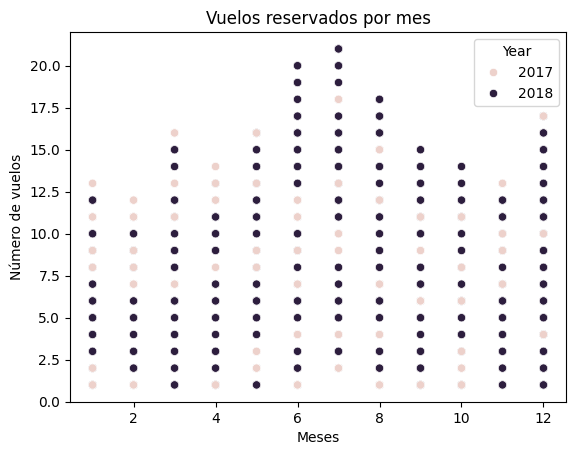

In [36]:
# Tenemos dos variables numéricas.
# Por lo que usamos el gráfico de dispersión: SCATTER PLOT

# Creamos la gráfica Scatter con Seaborn:
sns.scatterplot(x='Month', 
                y='Flights Booked', 
                data=df_limpio, 
                hue='Year', 
                color='orange')
# Personalizamos el gráfico:
plt.title('Vuelos reservados por mes')
plt.xlabel('Meses')
plt.ylabel('Número de vuelos')
# Mostramos el gráfico:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

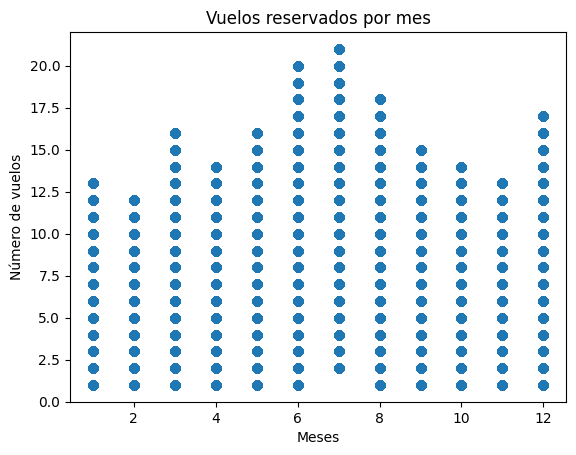

In [37]:
# Tenemos dos variables numéricas.
# Por lo que usamos el gráfico de dispersión: SCATTER PLOT

# Creamos el g´rafico Scatter con Plotly:
plt.scatter(x='Month', 
            y='Flights Booked', 
            data=df_limpio)
# Personalizamos el gráfico:
plt.title('Vuelos reservados por mes')
plt.xlabel('Meses')
plt.ylabel('Número de vuelos')
# Mostramos el gráfico:
plt.show

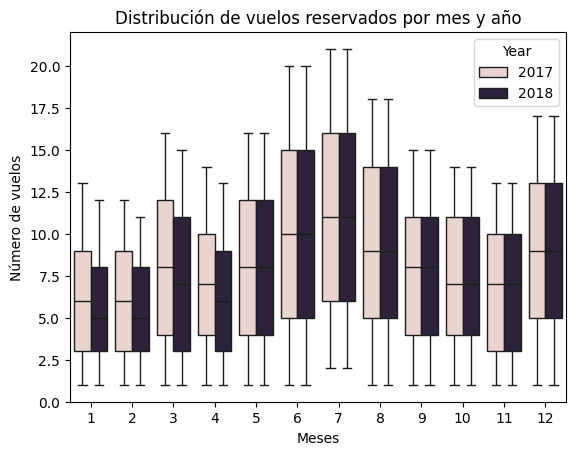

In [38]:
# Tenemos dos variables numéricas.
# Por lo que usamos el gráfico de cajas: BOXPLOT

# Creamos un gráfico de cajas para cada mes y lo comparamos con los años 2017 y 2018:
sns.boxplot(x='Month', 
            y='Flights Booked', 
            data=df_limpio, 
            hue='Year')
# Personalizamos el gráfico:
plt.title('Distribución de vuelos reservados por mes y año')
plt.xlabel('Meses')
plt.ylabel('Número de vuelos')
# Mostramos el gráfico:
plt.show()

In [ ]:
# ==============================================================================================
# ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
# ==============================================================================================

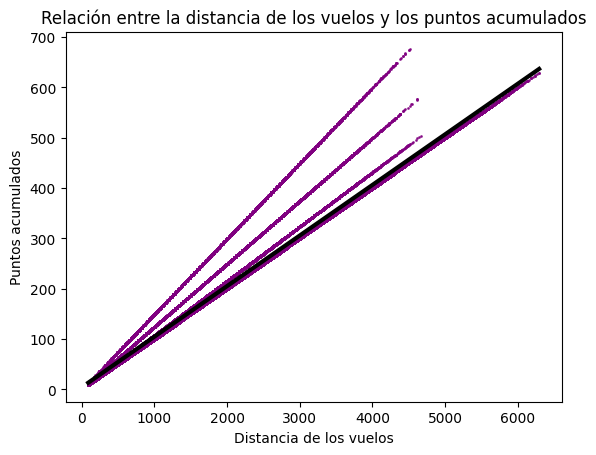

In [39]:
# Tenemos dos variables numéricas.
# Por lo que usamos el gráfico de Regresión: REGPLOT

# Creamos la gráfica Regplot con Seaborn:
sns.regplot(x='Distance', 
            y='Points Accumulated', 
            data=df_limpio, 
            line_kws = {"color": "black", "linewidth": 3}, # cambiar el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "purple", "s": 1}) # cambiar el color y el tamaño de los puntos del scaterplot
# Personalizamos el gráfico:
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados")
plt.xlabel("Distancia de los vuelos")
plt.ylabel("Puntos acumulados")
# Mostramos el gráfico:
plt.show()

La correlación es:  1.0


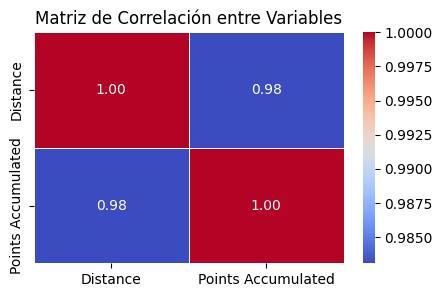

In [40]:
# Tenemos dos variables numéricas.
# Por lo que usamos la matriz de coeficientes de correlación: HEATMAP

# Aplicamos la matriz de correlación:
correlation = df_limpio[['Distance', 'Points Accumulated']].corr()
# Visualizamos el resultado de la función de correlación:
print("La correlación es: ", correlation.iloc[0,0])
# Creamos el gráfico de Heatmap con Seaborn:
plt.figure(figsize=(5, 3))
sns.heatmap(correlation, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=.5)
# Personalizamos la gráfica:
plt.title('Matriz de Correlación entre Variables')
# Muestramos la gráfica:
plt.show()

In [42]:
# ================================================================
# ¿Cuál es la distribución de los clientes por provincia o estado?
# ================================================================

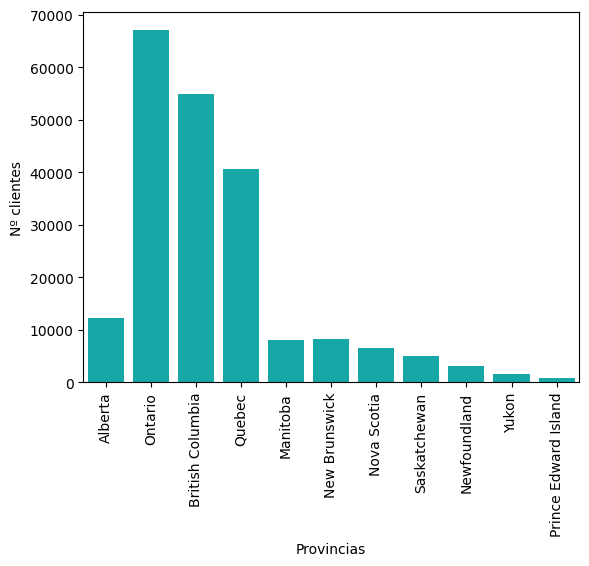

In [43]:
# Tenemos una variable categórica.
# Por lo que usamos la gráfica de barras de conteo de frecuencias: COUNTPLOT

# Calculamos la frecuencia de los clientes por provincia:
sns.countplot(x='Province', data=df_limpio)
# Contamos los valores y los ordenamos de mayor a menor:
orden_province = df_final['Province'].value_counts().index
# Creamos el gráfico de barras con los valores ordenados:
sns.countplot(x='Province', 
              data=df_limpio, 
              color = 'c', 
              order=orden_province)
# Personalizamos el gráfico:
plt.xticks(rotation=90)
plt.xlabel("Provincias")
plt.ylabel("Nº clientes")
# Mostramos el gráfico:
plt.show()

In [ ]:
# =============================================================================================
# ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
# =============================================================================================

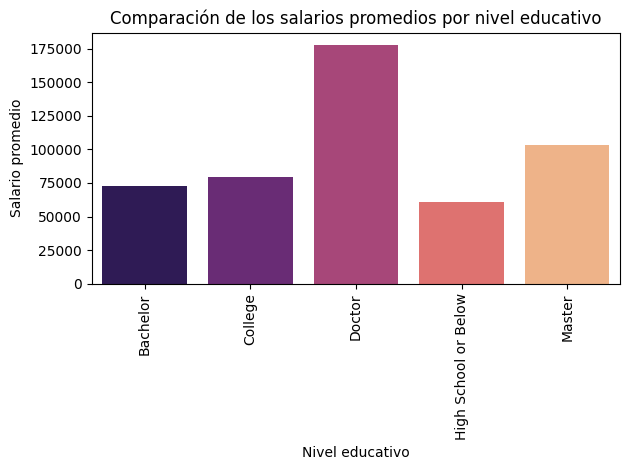

In [44]:
# Tenemos una variable categórica y otra numérica.
# Por lo que usamos la gráfica que relaciones variables de diferente tipo: BARPLOT

# Agrupamos por nivel educativo y calculamos su salario promedio:
salary_mean = df_limpio.groupby('Education')['Salary'].mean()
# Creamos el gráfico Barplot con Seaborn:
sns.barplot(x = salary_mean.index,
            y = salary_mean,
            palette = 'magma')
# Personalizamos la gráfica:
plt.title('Comparación de los salarios promedios por nivel educativo')
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=90)
plt.tight_layout()
# Mostramos la gráfica:
plt.show()

In [ ]:
# =================================================================================
# ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
# =================================================================================

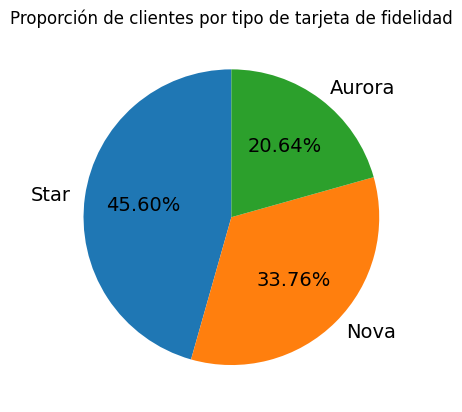

In [45]:
# Tenemos una variable categórica.
# Para ello usamos la gráfica de porcentajes o proporciones: PIE CHART

# Agrupamos por tipo de tarjeta de fidelización y hacemos un conteo de cada una de ellas:
count_cards = df_limpio['Loyalty Card'].value_counts()
# Creamos el gráfico PieChart:
plt.pie(count_cards, 
        labels=count_cards.index, 
        autopct='%1.2f%%',
        textprops={'fontsize': 14}, 
        startangle=90)
# Personalizamos la gráfica:
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
# Mostramos la gráfica:
plt.show()

In [46]:
# =================================================================
# ¿Cómo se distribuyen los clientes según su estado civil y género?
# =================================================================

In [47]:
# Creamos un Crosstab para ver los datos:
crosstab_marital = pd.crosstab(df_limpio['Gender'], df_limpio['Marital Status'])
crosstab_marital

Marital Status,Divorced,Married,Single
Gender,,,
Female,15302,60344,28083
Male,15659,60546,27698


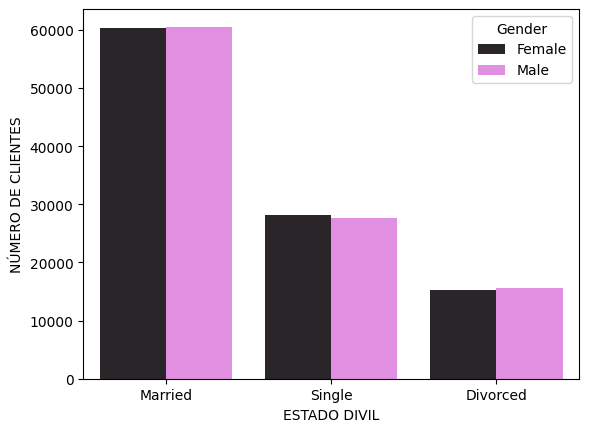

In [48]:
# Tenemos dos variables variables categóricas.
# Para ello usamos el gráfico de barras con hue: COUNTPLOT

# Contamos los valores y los ordenamos de mayor a menor:
orden_marital = df_limpio['Marital Status'].value_counts().index
# Creamos el gráfico de barras con los valores ordenados:
sns.countplot(x = 'Marital Status',
              data = df_limpio,
              color = 'violet', 
              order = orden_marital, 
              hue = 'Gender')
# Personalizamos el gráfico:
plt.xlabel("ESTADO DIVIL")
plt.ylabel("NÚMERO DE CLIENTES")
# Mostramos el gráfico:
plt.show()

BONUS - FASE 3 - EVALUACIÓN DE DIFERENCIAS EN RESERVAS DE VUELOS POR NIVEL EDUCATIVO

- Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

--------------------------------------------
1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [99]:
# Creamos un Crosstab para ver sólo las columnas relevantes:
df_filtrado = df_limpio[['Flights Booked', 'Education']]
df_filtrado

,Flights Booked,Education
Loyalty Number,,
100018,3,Bachelor
100102,10,College
100140,6,College
100428,6,Bachelor
100550,3,Bachelor
...,...,...
734647,15,Bachelor
790475,7,Bachelor
906428,13,Bachelor


---------------------------------------
2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.

In [103]:
# Eliminamos la propiedad de índice para la variable 'Loyalty Number' para poder trabajar con ella como columna:
df_filtrado.reset_index(inplace=True)

In [111]:
# NUEVO CONJUNTO DE DATOS CON LAS COLUMNAS RELEVANTES Y AGRUPADO POR NIVEL EDUCATIVO:

# Agrupamos los datos por nivel educativo ('Education') con un GroupBy.
# Y contamos los vuelos reservados ('Flights Booked') por nivel educativo.
# Y los números de socios ('Loyalty Number').
df_grouped = df_filtrado.groupby('Education').agg({'Flights Booked': 'sum', 'Loyalty Number': 'count'}).reset_index()
df_grouped

,Education,Flights Booked,Loyalty Number
0,Bachelor,1038123,129303
1,College,426398,52834
2,Doctor,74036,9193
3,High School or Below,78993,9855
4,Master,51614,6447


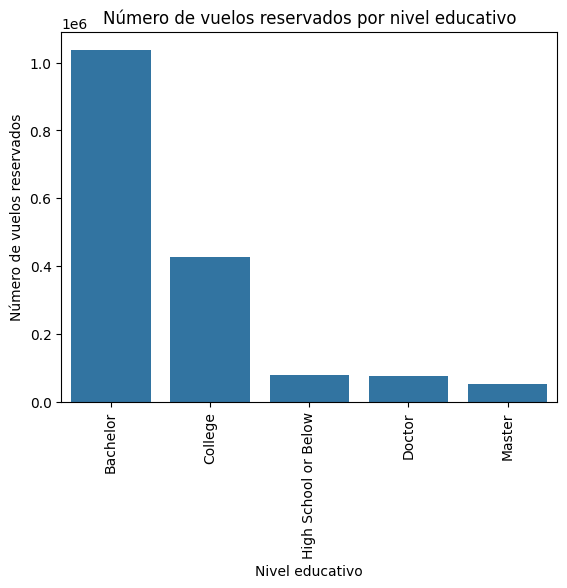

In [110]:
# VISUALIZACIÓN DEL ANTERIOR CONJUNTO DE DATOS:

# Agrupamos los datos por nivel educativo y contamos el número de vuelos:
flights_education = df_limpio.groupby('Education')['Flights Booked'].sum().reset_index()
# Ordenamos los datos por el número de vuelos de forma descendente:
flights_education = flights_education.sort_values(by='Flights Booked', ascending=False)
# Creamos el gráfico de barras:
sns.barplot(x='Education', 
            y='Flights Booked', 
            data=flights_education)
# Personalizamos el gráfico:
plt.title("Número de vuelos reservados por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Número de vuelos reservados")
plt.xticks(rotation=90)
# Mostramos el gráfico:
plt.show()

In [109]:
# CÁLCULO DE LAS ESTADÍTICAS DESCRIPTIVAS BÁSICAS DEL NUEVO CONJUNTO DE DATOS:

# Agrupamos los datos por nivel educativo y calculamos las estadísticas básicas_
df_grouped1 = df_limpio.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'median', 'count', 'min', 'max'])
# Mostramos los resultados
df_grouped1

,mean,std,median,count,min,max
Education,,,,,,
Bachelor,8.028607,4.669000,8.0,129303,1,21
College,8.070523,4.667465,8.0,52834,1,21
Doctor,8.053519,4.697898,8.0,9193,1,21
High School or Below,8.015525,4.680893,8.0,9855,1,21
Master,8.005894,4.620198,8.0,6447,1,21
